<a href="https://colab.research.google.com/github/bittenks/Analise-Sintomas-Gripais-de-Minas-Gerais/blob/main/Sintomas_Gripais_de_Minas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 ## Importacao

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.express as px



Dado Disponibilizado no site https://opendatasus.saude.gov.br/ne/dataset/casos-nacionais

Utilizando apenas dados-mg-1

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
nRowsRead = 1000 #caso eu quisesse delimitar n' de linhas
df = pd.read_csv('/content/drive/MyDrive/FACULDADE/MineiracaodeDados/dados-mg-1.csv', delimiter=';', encoding = "ISO-8859-2" )#nrows = nRowsRead
df.dataframeName = 'dados-mg-1.csv'
nRow, nCol = df.shape
df


,˙id,dataNotificacao,dataInicioSintomas,dataNascimento,sintomas,profissionalSaude,cbo,condicoes,estadoTeste,dataTeste,tipoTeste,resultadoTeste,paisOrigem,sexo,estado,estadoIBGE,municipio,municipioIBGE,origem,estadoNotificacao,estadoNotificacaoIBGE,municipioNotificacao,municipioNotificacaoIBGE,excluido,validado,idade,dataEncerramento,evolucaoCaso,classificacaoFinal
0,jjyn3lL8gs,2020-06-17T03:00:00.000Z,2020-06-17T03:00:00.000Z,1970-09-20T03:00:00.000Z,Outros,Năo,NaN,NaN,Concluído,2020-06-17T03:00:00.000Z,TESTE RÁPIDO - ANTICORPO,Negativo,NaN,Feminino,Minas Gerais,31.0,Moema,3142403.0,undefined,Minas Gerais,31.0,Moema,3142403.0,undefined,undefined,50.0,NaN,NaN,NaN
1,yXLVkDqxxB,2020-06-18T12:29:21.965Z,2020-06-04T03:00:00.000Z,1955-12-17T03:00:00.000Z,"Tosse, Dispneia",Năo,NaN,Diabetes,NaN,NaN,NaN,NaN,NaN,Feminino,Minas Gerais,31.0,Dores de Guanhăes,3123106.0,undefined,Minas Gerais,31.0,Dores de Guanhăes,3123106.0,undefined,undefined,65.0,NaN,NaN,NaN
2,fsgj73mg2T,2020-06-16T03:00:00.000Z,2020-06-07T03:00:00.000Z,1977-12-13T03:00:00.000Z,"Febre, Tosse, Outros",Năo,NaN,NaN,Concluído,2020-06-16T03:00:00.000Z,TESTE RÁPIDO - ANTICORPO,Negativo,NaN,Feminino,Minas Gerais,31.0,Contagem,3118601.0,undefined,Minas Gerais,31.0,Contagem,3118601.0,undefined,undefined,43.0,2020-06-18T03:00:00.000Z,Cura,Descartado
3,KroYkISwwQ,2020-06-18T11:16:31.500Z,2020-06-18T03:00:00.000Z,1987-10-07T03:00:00.000Z,Outros,Năo,NaN,NaN,Concluído,2020-06-18T03:00:00.000Z,TESTE RÁPIDO - ANTICORPO,Negativo,NaN,Masculino,Minas Gerais,31.0,Santa Bárbara,3157203.0,undefined,Minas Gerais,31.0,Belo Horizonte,3106200.0,undefined,undefined,33.0,NaN,NaN,NaN
4,1bk1rbGYAE,2020-06-18T11:17:04.852Z,2020-06-11T03:00:00.000Z,1969-05-15T03:00:00.000Z,"Febre, Tosse, Dispneia",Năo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Feminino,Minas Gerais,31.0,Sete Lagoas,3167202.0,undefined,Minas Gerais,31.0,Sete Lagoas,3167202.0,undefined,undefined,52.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,CFjgbB2xgM,2021-04-06T03:00:00.000Z,2021-04-06T03:00:00.000Z,1993-12-29T02:00:00.000Z,Assintomático,Năo,NaN,NaN,Concluído,2021-04-06T03:00:00.000Z,TESTE RÁPIDO - ANTICORPO,Negativo,NaN,Feminino,Minas Gerais,31.0,Ouro Preto,3146107.0,undefined,Minas Gerais,31.0,Ouro Preto,3146107.0,undefined,undefined,27.0,NaN,NaN,NaN
999996,e3B6pZKBNP,2020-06-30T03:00:00.000Z,2020-06-29T03:00:00.000Z,1989-11-13T02:00:00.000Z,"Tosse, Dor de Garganta",Năo,NaN,NaN,Exame Năo Solicitado,NaN,NaN,NaN,NaN,Masculino,Minas Gerais,31.0,Ipatinga,3131307.0,undefined,Minas Gerais,31.0,Ipatinga,3131307.0,undefined,undefined,31.0,2021-03-30T03:00:00.000Z,Cura,Síndrome Gripal Năo Especificada
999997,QE6rx3Te2Z,2021-04-14T03:00:13.130Z,2021-04-10T03:00:00.000Z,1988-01-15T02:00:00.000Z,Assintomático,Năo,NaN,NaN,Concluído,2021-04-11T03:00:00.000Z,RT-PCR,Positivo,NaN,Masculino,Minas Gerais,31.0,Itacambira,3132008.0,undefined,Rio de Janeiro,33.0,Niterói,3303302.0,undefined,undefined,33.0,NaN,NaN,NaN
999998,FofM2aSW8l,2020-11-06T03:00:53.017Z,2020-10-29T03:00:00.000Z,1988-07-06T03:00:00.000Z,Dor de Garganta,Năo,NaN,NaN,Concluído,2020-11-04T03:00:00.000Z,RT-PCR,Negativo,NaN,Feminino,Minas Gerais,31.0,Montes Claros,3143302.0,undefined,Minas Gerais,31.0,Montes Claros,3143302.0,undefined,undefined,33.0,NaN,NaN,NaN


## <strong>criacao da coluna Regiao</strong>




In [ ]:
map_dictionary ={
'Arinos': "Nordeste",
'Bonfinópolis de Minas': "Nordeste",
'Buritis': "Nordeste",
'Cabeceira Grande': "Nordeste",
'Dom Bosco': "Nordeste",
'Formoso': "Nordeste",
'Natalândia': "Nordeste",
'Unaí': "Nordeste",
'Uruana de Minas': "Nordeste",
'Brasilândia de Minas': "Nordeste",
'Guarda-Mor': "Nordeste",
'João Pinheiro': "Nordeste",
'Lagamar': "Nordeste",
'Lagoa Grande': "Nordeste",
'Paracatu': "Nordeste",
'Presidente Olegário': "Nordeste",
'São Gonçalo do Abaeté': "Nordeste",
'Varjão de Minas': "Nordeste",
'Vazante': "Nordeste",
'Bonito de Minas': "Norte",
'Chapada Gaúcha': "Norte",
'Cônego Marinho': "Norte",
'Icaraí de Minas': "Norte",
'Itacarambi': "Norte",
'Januária': "Norte",
'Juvenília': "Norte",
'Manga': "Norte",
'Matias Cardoso': "Norte",
'Miravânia': "Norte",
'Montalvânia': "Norte",
'Pedras de Maria da Cruz': "Norte",
'Pintópolis': "Norte",
'São Francisco': "Norte",
'São João das Missões': "Norte",
'Urucuia': "Norte",
'Catuti': "Norte",
'Espinosa': "Norte",
'Gameleiras': "Norte",
'Jaíba': "Norte",
'Janaúba': "Norte",
'Mamonas': "Norte",
'Mato Verde': "Norte",
'Monte Azul': "Norte",
'Nova Porteirinha': "Norte",
'Pai Pedro': "Norte",
'Porteirinha': "Norte",
'Riacho dos Machados': "Norte",
'Serranópolis de Minas': "Norte",
'Cachoeira Dourada': "Triangulo Mineiro",
'Capinópolis': "Triangulo Mineiro",
'Gurinhatã': "Triangulo Mineiro",
'Ipiaçu': "Triangulo Mineiro",
'Ituiutaba': "Triangulo Mineiro",
'Santa Vitória': "Triangulo Mineiro",
'Araguari': "Triangulo Mineiro",
'Araporã': "Triangulo Mineiro",
'Canápolis': "Triangulo Mineiro",
'Cascalho Rico': "Triangulo Mineiro",
'Centralina': "Triangulo Mineiro",
'Indianópolis': "Triangulo Mineiro",
'Monte Alegre de Minas': "Triangulo Mineiro",
'Prata': "Triangulo Mineiro",
'Uberlândia': "Triangulo Mineiro",
'Abadia dos Dourados': "Triangulo Mineiro",
'Coromande': "Triangulo Mineiro",
'Cruzeiro da Fortaleza': "Triangulo Mineiro",
'Douradoquara': "Triangulo Mineiro",
'Estrela do Sul': "Triangulo Mineiro",
'Grupiara': "Triangulo Mineiro",
'Iraí de Minas': "Triangulo Mineiro",
'Monte Carmelo': "Triangulo Mineiro",
'Patrocínio': "Triangulo Mineiro",
'Romaria': "Triangulo Mineiro",
'Serra do Salitre': "Triangulo Mineiro",
'Arapuá': "Triangulo Mineiro",
'Carmo do Paranaíba': "Triangulo Mineiro",
'Guimarânia': "Triangulo Mineiro",
'Lagoa Formosa': "Triangulo Mineiro",
'Matutina': "Triangulo Mineiro",
'Patos de Minas': "Triangulo Mineiro",
'Rio Paranaíba': "Triangulo Mineiro",
'Santa Rosa da Serra': "Triangulo Mineiro",
'São Gotardo': "Triangulo Mineiro",
'Tiros': "Triangulo Mineiro",
'Campina Verde': "Triangulo Mineiro",
'Carneirinho': "Triangulo Mineiro",
'Comendador Gomes': "Triangulo Mineiro",
'Fronteira': "Triangulo Mineiro",
'Frutal': "Triangulo Mineiro",
'Itapajipe': "Triangulo Mineiro",
'Iturama': "Triangulo Mineiro",
'Limeira do Oeste': "Triangulo Mineiro",
'Pirajuba': "Triangulo Mineiro",
'Planura': "Triangulo Mineiro",
'São Francisco de Sales': "Triangulo Mineiro",
'União de Minas': "Triangulo Mineiro",
'Água Comprida': "Triangulo Mineiro",
'Campo Florido': "Triangulo Mineiro",
'Conceição das Alagoas': "Triangulo Mineiro",
'Conquista': "Triangulo Mineiro",
'Delta': "Triangulo Mineiro",
'Uberaba': "Triangulo Mineiro",
'Veríssimo': "Triangulo Mineiro",
'Araxá': "Triangulo Mineiro",
'Campos Altos': "Triangulo Mineiro",
'Ibiá': "Triangulo Mineiro",
'Nova Ponte': "Triangulo Mineiro",
'Pedrinópolis': "Triangulo Mineiro",
'Perdizes': "Triangulo Mineiro",
'Pratinha': "Triangulo Mineiro",
'Couto de Magalhães de Minas': "Jequitinhonha",
'Datas': "Jequitinhonha",
'Diamantina': "Jequitinhonha",
'Felício dos Santos': "Jequitinhonha",
'Gouveia': "Jequitinhonha",
'Presidente Kubitschek': "Jequitinhonha",
'São Gonçalo do Rio Preto': "Jequitinhonha",
'Senador Modestino Gonçalves': "Jequitinhonha",
'Angelândia': "Jequitinhonha",
'Aricanduva': "Jequitinhonha",
'Berilo': "Jequitinhonha",
'Capelinha': "Jequitinhonha",
'Carbonita': "Jequitinhonha",
'Chapada do Norte': "Jequitinhonha",
'Francisco Badaró': "Jequitinhonha",
'Itamarandiba': "Jequitinhonha",
'Jenipapo de Minas': "Jequitinhonha",
'José Gonçalves de Minas': "Jequitinhonha",
'Leme do Prado': "Jequitinhonha",
'Minas Novas': "Jequitinhonha",
'Turmalina': "Jequitinhonha",
'Veredinha': "Jequitinhonha",
'Araçuaí': "Jequitinhonha",
'Caraí': "Jequitinhonha",
'Coronel Murta': "Jequitinhonha",
'Itinga': "Jequitinhonha",
'Novo Cruzeiro': "Jequitinhonha",
'Padre Paraíso': "Jequitinhonha",
'Ponto dos Volantes': "Jequitinhonha",
'Virgem da Lapa': "Jequitinhonha",
'Cachoeira de Pajeú': "Jequitinhonha",
'Comercinho': "Jequitinhonha",
'Itaobim': "Jequitinhonha",
'Medina': "Jequitinhonha",
'Pedra Azul': "Jequitinhonha",
'Almenara': "Jequitinhonha",
'Bandeira': "Jequitinhonha",
'Divisópolis': "Jequitinhonha",
'Felisburgo': "Jequitinhonha",
'Jacinto': "Jequitinhonha",
'Jequitinhonha': "Jequitinhonha",
'Joaíma': "Jequitinhonha",
'Jordânia': "Jequitinhonha",
'Mata Verde': "Jequitinhonha",
'Monte Formoso': "Jequitinhonha",
'Palmópolis': "Jequitinhonha",
'Rio do Prado': "Jequitinhonha",
'Rubim': "Jequitinhonha",
'Salto da Divisa': "Jequitinhonha",
'Santa Maria do Salto': "Jequitinhonha",
'Santo Antônio do Jacinto': "Jequitinhonha",
'Ataléia': "Vale do Mucuri",
'Catuji': "Vale do Mucuri",
'Franciscópolis': "Vale do Mucuri",
'Frei Gaspar': "Vale do Mucuri",
'Itaipé': "Vale do Mucuri",
'Ladainha': "Vale do Mucuri",
'Malacacheta': "Vale do Mucuri",
'Novo Oriente de Minas': "Vale do Mucuri",
'Ouro Verde de Minas': "Vale do Mucuri",
'Pavão': "Vale do Mucuri",
'Poté': "Vale do Mucuri",
'Setubinha': "Vale do Mucuri",
'Teófilo Otôni': "Vale do Mucuri",
'Águas Formosas': "Vale do Mucuri",
'Bertópolis': "Vale do Mucuri",
'Carlos Chagas': "Vale do Mucuri",
'Crisólita': "Vale do Mucuri",
'Fronteira dos Vales': "Vale do Mucuri",
'Maxacalis': "Vale do Mucuri",
'Nanuque': "Vale do Mucuri",
'Santa Helena de Minas': "Vale do Mucuri",
'Serra dos Aimorés': "Vale do Mucuri",
'Umburatiba': "Vale do Mucuri",
'Abaeté': "Central Mineira",
'Biquinhas': "Central Mineira",
'Cedro do Abaeté': "Central Mineira",
'Morada Nova de Minas': "Central Mineira",
'Paineiras': "Central Mineira",
'Pompéu': "Central Mineira",
'Três Marias': "Central Mineira",
'Augusto de Lima': "Central Mineira",
'Buenópolis': "Central Mineira",
'Corinto': "Central Mineira",
'Curvelo': "Central Mineira",
'Felixlândia': "Central Mineira",
'Inimutaba': "Central Mineira",
'Joaquim Felício': "Central Mineira",
'Monjolos': "Central Mineira",
'Morro da Garça': "Central Mineira",
'Presidente Juscelino': "Central Mineira",
'Santo Hipólito': "Central Mineira",
'Araújos': "Central Mineira",
'Bom Despacho': "Central Mineira",
'Dores do Indaiá': "Central Mineira",
'Estrela do Indaiá': "Central Mineira",
'Japaraíba': "Central Mineira",
'Lagoa da Prata': "Central Mineira",
'Leandro Ferreira': "Central Mineira",
'Luz': "Central Mineira",
'Martinho Campos': "Central Mineira",
'Moema': "Central Mineira",
'Quartel Geral': "Central Mineira",
'Serra da Saudade': "Central Mineira",
'Araçaí': "Metropolitana de Belo Horizonte",
'Baldim': "Metropolitana de Belo Horizonte",
'Cachoeira da Prata': "Metropolitana de Belo Horizonte",
'Caetanópolis': "Metropolitana de Belo Horizonte",
'Capim Branco': "Metropolitana de Belo Horizonte",
'Cordisburgo': "Metropolitana de Belo Horizonte",
'Fortuna de Minas': "Metropolitana de Belo Horizonte",
'Funilândia': "Metropolitana de Belo Horizonte",
'Inhaúma': "Metropolitana de Belo Horizonte",
'Jabuticatubas': "Metropolitana de Belo Horizonte",
'Jequitibá': "Metropolitana de Belo Horizonte",
'Maravilhas': "Metropolitana de Belo Horizonte",
'Matozinhos': "Metropolitana de Belo Horizonte",
'Papagaios': "Metropolitana de Belo Horizonte",
'Paraopeba': "Metropolitana de Belo Horizonte",
'Pequi': "Metropolitana de Belo Horizonte",
'Prudente de Morais': "Metropolitana de Belo Horizonte",
'Santana de Pirapama': "Metropolitana de Belo Horizonte",
'Santana do Riacho': "Metropolitana de Belo Horizonte",
'Sete Lagoas': "Metropolitana de Belo Horizonte",
'Alvorada de Minas': "Metropolitana de Belo Horizonte",
'Conceição do Mato Dentro': "Metropolitana de Belo Horizonte",
'Congonhas do Norte': "Metropolitana de Belo Horizonte",
'Dom Joaquim': "Metropolitana de Belo Horizonte",
'Itambé do Mato Dentro': "Metropolitana de Belo Horizonte",
'Morro do Pilar': "Metropolitana de Belo Horizonte",
'Passabém': "Metropolitana de Belo Horizonte",
'Rio Vermelho': "Metropolitana de Belo Horizonte",
'Santo Antônio do Itambé': "Metropolitana de Belo Horizonte",
'Santo Antônio do Rio Abaixo': "Metropolitana de Belo Horizonte",
'São Sebastião do Rio Preto': "Metropolitana de Belo Horizonte",
'Serra Azul de Minas': "Metropolitana de Belo Horizonte",
'Serro': "Metropolitana de Belo Horizonte",
'Florestal': "Metropolitana de Belo Horizonte",
'Onça de Pitangui': "Metropolitana de Belo Horizonte",
'Pará de Minas': "Metropolitana de Belo Horizonte",
'Pitangui': "Metropolitana de Belo Horizonte",
'São José da Varginha': "Metropolitana de Belo Horizonte",
'Belo Horizonte': "Metropolitana de Belo Horizonte",
'Betim': "Metropolitana de Belo Horizonte",
'Brumadinho': "Metropolitana de Belo Horizonte",
'Caeté': "Metropolitana de Belo Horizonte",
'Confins': "Metropolitana de Belo Horizonte",
'Contagem': "Metropolitana de Belo Horizonte",
'Esmeraldas': "Metropolitana de Belo Horizonte",
'Ibirité': "Metropolitana de Belo Horizonte",
'Igarapé': "Metropolitana de Belo Horizonte",
'Juatuba': "Metropolitana de Belo Horizonte",
'Lagoa Santa': "Metropolitana de Belo Horizonte",
'Mário Campos': "Metropolitana de Belo Horizonte",
'Mateus Leme': "Metropolitana de Belo Horizonte",
'Nova Lima': "Metropolitana de Belo Horizonte",
'Pedro Leopoldo': "Metropolitana de Belo Horizonte",
'Raposos': "Metropolitana de Belo Horizonte",
'Ribeirão das Neves': "Metropolitana de Belo Horizonte",
'Rio Acima': "Metropolitana de Belo Horizonte",
'Sabará': "Metropolitana de Belo Horizonte",
'Santa Luzia': "Metropolitana de Belo Horizonte",
'São Joaquim de Bicas': "Metropolitana de Belo Horizonte",
'São José da Lapa': "Metropolitana de Belo Horizonte",
'Sarzedo': "Metropolitana de Belo Horizonte",
'Vespasiano': "Metropolitana de Belo Horizonte",
'Alvinópolis': "Metropolitana de Belo Horizonte",
'Barão de Cocais': "Metropolitana de Belo Horizonte",
'Bela Vista de Minas': "Metropolitana de Belo Horizonte",
'Bom Jesus do Amparo': "Metropolitana de Belo Horizonte",
'Catas Altas': "Metropolitana de Belo Horizonte",
'Dionísio': "Metropolitana de Belo Horizonte",
'Ferros': "Metropolitana de Belo Horizonte",
'Itabira': "Metropolitana de Belo Horizonte",
'João Monlevade': "Metropolitana de Belo Horizonte",
'Nova Era': "Metropolitana de Belo Horizonte",
'Nova União': "Metropolitana de Belo Horizonte",
'Rio Piracicaba': "Metropolitana de Belo Horizonte",
'Santa Bárbara': "Metropolitana de Belo Horizonte",
'Santa Maria de Itabira': "Metropolitana de Belo Horizonte",
'São Domingos do Prata': "Metropolitana de Belo Horizonte",
'São Gonçalo do Rio Abaixo': "Metropolitana de Belo Horizonte",
'São José do Goiabal': "Metropolitana de Belo Horizonte",
'Taquaraçu de Minas': "Metropolitana de Belo Horizonte",
'Belo Vale': "Metropolitana de Belo Horizonte",
'Bonfim': "Metropolitana de Belo Horizonte",
'Crucilândia': "Metropolitana de Belo Horizonte",
'Itaguara': "Metropolitana de Belo Horizonte",
'Itatiaiuçu': "Metropolitana de Belo Horizonte",
'Jeceaba': "Metropolitana de Belo Horizonte",
'Moeda': "Metropolitana de Belo Horizonte",
'Piedade dos Gerais': "Metropolitana de Belo Horizonte",
'Rio Manso': "Metropolitana de Belo Horizonte",
'Diogo de Vasconcelos': "Metropolitana de Belo Horizonte",
'Itabirito': "Metropolitana de Belo Horizonte",
'Mariana': "Metropolitana de Belo Horizonte",
'Ouro Preto': "Metropolitana de Belo Horizonte",
'Casa Grande': "Metropolitana de Belo Horizonte",
'Catas Altas da Noruega': "Metropolitana de Belo Horizonte",
'Congonhas': "Metropolitana de Belo Horizonte",
'Conselheiro Lafaiete': "Metropolitana de Belo Horizonte",
'Cristiano Otôni': "Metropolitana de Belo Horizonte",
'Desterro de Entre-Rios:': "Metropolitana de Belo Horizonte",
'Entre-Rios de Minas': "Metropolitana de Belo Horizonte",
'Itaverava': "Metropolitana de Belo Horizonte",
'Ouro Branco': "Metropolitana de Belo Horizonte",
'Queluzito': "Metropolitana de Belo Horizonte",
'Queluzito': "Metropolitana de Belo Horizonte",
'São Brás do Suaçuí': "Metropolitana de Belo Horizonte",
'Braúnas': "Vale do Rio Doce",
'Carmésia': "Vale do Rio Doce",
'Coluna': "Vale do Rio Doce",
'Divinolândia de Minas': "Vale do Rio Doce",
'Divinolândia de Minas': "Vale do Rio Doce",
'Divinolândia de Minas': "Vale do Rio Doce",
'Guanhães': "Vale do Rio Doce",
'Materlândia': "Vale do Rio Doce",
'Paulistas': "Vale do Rio Doce",
'Sabinópolis': "Vale do Rio Doce",
'Sabinópolis': "Vale do Rio Doce",
'São João Evangelista': "Vale do Rio Doce",
'Sardoá': "Vale do Rio Doce",
'Senhora do Porto': "Vale do Rio Doce",
'Virginópolis': "Vale do Rio Doce",
'Água Boa': "Vale do Rio Doce",
'Cantagalo': "Vale do Rio Doce",
'Frei Lagonegro': "Vale do Rio Doce",
'José Raydan': "Vale do Rio Doce",
'Peçanha': "Vale do Rio Doce",
'Santa Maria do Suaçuí': "Vale do Rio Doce",
'Santa Maria do Suaçuí': "Vale do Rio Doce",
'Santa Maria do Suaçuí': "Vale do Rio Doce",
'Santa Maria do Suaçuí': "Vale do Rio Doce",
'Alpercata': "Vale do Rio Doce",
'Campanário': "Vale do Rio Doce",
'Campanário': "Vale do Rio Doce",
'Coroaci': "Vale do Rio Doce",
'Divino das Laranjeiras': "Vale do Rio Doce",
'Engenheiro Caldas': "Vale do Rio Doce",
'Fernandes Tourinho': "Vale do Rio Doce",
'Frei Inocêncio': "Vale do Rio Doce",
'Galiléia': "Vale do Rio Doce",
'Governador Valadares': "Vale do Rio Doce",
'Itambacuri': "Vale do Rio Doce",
'Itanhomi': "Vale do Rio Doce",
'Jampruca': "Vale do Rio Doce",
'Marilac': "Vale do Rio Doce",
'Matias Lobato': "Vale do Rio Doce",
'Nacip Raydan': "Vale do Rio Doce",
'Nova Módica': "Vale do Rio Doce",
'Pescador': "Vale do Rio Doce",
'São Geraldo da Piedade': "Vale do Rio Doce",
'São Geraldo do Baixio': "Vale do Rio Doce",
'São José da Safira': "Vale do Rio Doce",
'São José do Divino': "Vale do Rio Doce",
'Sobrália': "Vale do Rio Doce",
'Tumiritinga': "Vale do Rio Doce",
'Virgolândia': "Vale do Rio Doce",
'Central de Minas': "Vale do Rio Doce",
'Itabirinha de Mantena': "Vale do Rio Doce",
'Mantena': "Vale do Rio Doce",
'Mendes Pimentel': "Vale do Rio Doce",
'Nova Belém': "Vale do Rio Doce",
'São Félix de Minas': "Vale do Rio Doce",
'São João do Manteninha': "Vale do Rio Doce",
'Belo Oriente': "Vale do Rio Doce",
'Coronel Fabriciano': "Vale do Rio Doce",
'Ipatinga': "Vale do Rio Doce",
'Jaguaraçu': "Vale do Rio Doce",
'Joanésia': "Vale do Rio Doce",
'Marliéria': "Vale do Rio Doce",
'Mesquita': "Vale do Rio Doce",
'Naque': "Vale do Rio Doce",
'Periquito': "Vale do Rio Doce",
'Santana do Paraíso': "Vale do Rio Doce",
'Timóteo': "Vale do Rio Doce",
'Bom Jesus do Galho': "Vale do Rio Doce",
'Bugre': "Vale do Rio Doce",
'Caratinga': "Vale do Rio Doce",
'Córrego Novo': "Vale do Rio Doce",
'Dom Cavati': "Vale do Rio Doce",
'Entre-Folhas': "Vale do Rio Doce",
'Iapu': "Vale do Rio Doce",
'Imbé de Minas': "Vale do Rio Doce",
'Inhapim': "Vale do Rio Doce",
'Ipaba': "Vale do Rio Doce",
'Piedade de Caratinga': "Vale do Rio Doce",
'Pingo-dÁgua': "Vale do Rio Doce",
'Santa Rita de Minas': "Vale do Rio Doce",
'São Domingos das Dores': "Vale do Rio Doce",
'São João do Oriente': "Vale do Rio Doce",
'São Sebastião do Anta': "Vale do Rio Doce",
'Tarumirim': "Vale do Rio Doce",
'Ubaporanga': "Vale do Rio Doce",
'Vargem Alegre': "Vale do Rio Doce",
'Aimorés': "Vale do Rio Doce",
'Alvarenga': "Vale do Rio Doce",
'Arinos': "Nordeste",
'Bonfinópolis de Minas': "Nordeste",
'Buritis': "Nordeste",
'Cabeceira Grande': "Nordeste",
'Dom Bosco': "Nordeste",
'Formoso': "Nordeste",
'Natalândia': "Nordeste",
'Unaí': "Nordeste",
'Uruana de Minas': "Nordeste",
'Brasilândia de Minas': "Nordeste",
'Guarda-Mor': "Nordeste",
'João Pinheiro': "Nordeste",
'Lagamar': "Nordeste",
'Lagoa Grande': "Nordeste",
'Paracatu': "Nordeste",
'Presidente Olegário': "Nordeste",
'São Gonçalo do Abaeté': "Nordeste",
'Varjão de Minas': "Nordeste",
'Vazante': "Nordeste",
'Bonito de Minas': "Norte",
'Chapada Gaúcha': "Norte",
'Cônego Marinho': "Norte",
'Icaraí de Minas': "Norte",
'Itacarambi': "Norte",
'Januária': "Norte",
'Juvenília': "Norte",
'Manga': "Norte",
'Matias Cardoso': "Norte",
'Miravânia': "Norte",
'Montalvânia': "Norte",
'Pedras de Maria da Cruz': "Norte",
'Pintópolis': "Norte",
'São Francisco': "Norte",
'São João das Missões': "Norte",
'Urucuia': "Norte",
'Catuti': "Norte",
'Espinosa': "Norte",
'Gameleiras': "Norte",
'Jaíba': "Norte",
'Janaúba': "Norte",
'Mamonas': "Norte",
'Mato Verde': "Norte",
'Monte Azul': "Norte",
'Nova Porteirinha': "Norte",
'Pai Pedro': "Norte",
'Porteirinha': "Norte",
'Riacho dos Machados': "Norte",
'Serranópolis de Minas': "Norte",
'Cachoeira Dourada': "Triangulo Mineiro",
'Capinópolis': "Triangulo Mineiro",
'Gurinhatã': "Triangulo Mineiro",
'Ipiaçu': "Triangulo Mineiro",
'Ituiutaba': "Triangulo Mineiro",
'Santa Vitória': "Triangulo Mineiro",
'Araguari': "Triangulo Mineiro",
'Araporã': "Triangulo Mineiro",
'Canápolis': "Triangulo Mineiro",
'Cascalho Rico': "Triangulo Mineiro",
'Centralina': "Triangulo Mineiro",
'Indianópolis': "Triangulo Mineiro",
'Monte Alegre de Minas': "Triangulo Mineiro",
'Prata': "Triangulo Mineiro",
'Uberlândia': "Triangulo Mineiro",
'Abadia dos Dourados': "Triangulo Mineiro",
'Coromande': "Triangulo Mineiro",
'Cruzeiro da Fortaleza': "Triangulo Mineiro",
'Douradoquara': "Triangulo Mineiro",
'Estrela do Sul': "Triangulo Mineiro",
'Grupiara': "Triangulo Mineiro",
'Iraí de Minas': "Triangulo Mineiro",
'Monte Carmelo': "Triangulo Mineiro",
'Patrocínio': "Triangulo Mineiro",
'Romaria': "Triangulo Mineiro",
'Serra do Salitre': "Triangulo Mineiro",
'Arapuá': "Triangulo Mineiro",
'Carmo do Paranaíba': "Triangulo Mineiro",
'Guimarânia': "Triangulo Mineiro",
'Lagoa Formosa': "Triangulo Mineiro",
'Matutina': "Triangulo Mineiro",
'Patos de Minas': "Triangulo Mineiro",
'Rio Paranaíba': "Triangulo Mineiro",
'Santa Rosa da Serra': "Triangulo Mineiro",
'São Gotardo': "Triangulo Mineiro",
'Tiros': "Triangulo Mineiro",
'Campina Verde': "Triangulo Mineiro",
'Carneirinho': "Triangulo Mineiro",
'Comendador Gomes': "Triangulo Mineiro",
'Fronteira': "Triangulo Mineiro",
'Frutal': "Triangulo Mineiro",
'Itapajipe': "Triangulo Mineiro",
'Iturama': "Triangulo Mineiro",
'Limeira do Oeste': "Triangulo Mineiro",
'Pirajuba': "Triangulo Mineiro",
'Planura': "Triangulo Mineiro",
'São Francisco de Sales': "Triangulo Mineiro",
'União de Minas': "Triangulo Mineiro",
'Água Comprida': "Triangulo Mineiro",
'Campo Florido': "Triangulo Mineiro",
'Conceição das Alagoas': "Triangulo Mineiro",
'Conquista': "Triangulo Mineiro",
'Delta': "Triangulo Mineiro",
'Uberaba': "Triangulo Mineiro",
'Veríssimo': "Triangulo Mineiro",
'Araxá': "Triangulo Mineiro",
'Campos Altos': "Triangulo Mineiro",
'Ibiá': "Triangulo Mineiro",
'Nova Ponte': "Triangulo Mineiro",
'Pedrinópolis': "Triangulo Mineiro",
'Perdizes': "Triangulo Mineiro",
'Pratinha': "Triangulo Mineiro",
'Couto de Magalhães de Minas': "Jequitinhonha",
'Datas': "Jequitinhonha",
'Diamantina': "Jequitinhonha",
'Felício dos Santos': "Jequitinhonha",
'Gouveia': "Jequitinhonha",
'Presidente Kubitschek': "Jequitinhonha",
'São Gonçalo do Rio Preto': "Jequitinhonha",
'Senador Modestino Gonçalves': "Jequitinhonha",
'Angelândia': "Jequitinhonha",
'Aricanduva': "Jequitinhonha",
'Berilo': "Jequitinhonha",
'Capelinha': "Jequitinhonha",
'Carbonita': "Jequitinhonha",
'Chapada do Norte': "Jequitinhonha",
'Francisco Badaró': "Jequitinhonha",
'Itamarandiba': "Jequitinhonha",
'Jenipapo de Minas': "Jequitinhonha",
'José Gonçalves de Minas': "Jequitinhonha",
'Leme do Prado': "Jequitinhonha",
'Minas Novas': "Jequitinhonha",
'Turmalina': "Jequitinhonha",
'Veredinha': "Jequitinhonha",
'Araçuaí': "Jequitinhonha",
'Caraí': "Jequitinhonha",
'Coronel Murta': "Jequitinhonha",
'Itinga': "Jequitinhonha",
'Novo Cruzeiro': "Jequitinhonha",
'Padre Paraíso': "Jequitinhonha",
'Ponto dos Volantes': "Jequitinhonha",
'Virgem da Lapa': "Jequitinhonha",
'Cachoeira de Pajeú': "Jequitinhonha",
'Comercinho': "Jequitinhonha",
'Itaobim': "Jequitinhonha",
'Medina': "Jequitinhonha",
'Pedra Azul': "Jequitinhonha",
'Almenara': "Jequitinhonha",
'Bandeira': "Jequitinhonha",
'Divisópolis': "Jequitinhonha",
'Felisburgo': "Jequitinhonha",
'Jacinto': "Jequitinhonha",
'Jequitinhonha': "Jequitinhonha",
'Joaíma': "Jequitinhonha",
'Jordânia': "Jequitinhonha",
'Mata Verde': "Jequitinhonha",
'Monte Formoso': "Jequitinhonha",
'Palmópolis': "Jequitinhonha",
'Rio do Prado': "Jequitinhonha",
'Rubim': "Jequitinhonha",
'Salto da Divisa': "Jequitinhonha",
'Santa Maria do Salto': "Jequitinhonha",
'Santo Antônio do Jacinto': "Jequitinhonha",
'Ataléia': "Vale do Mucuri",
'Catuji': "Vale do Mucuri",
'Franciscópolis': "Vale do Mucuri",
'Frei Gaspar': "Vale do Mucuri",
'Itaipé': "Vale do Mucuri",
'Ladainha': "Vale do Mucuri",
'Malacacheta': "Vale do Mucuri",
'Novo Oriente de Minas': "Vale do Mucuri",
'Ouro Verde de Minas': "Vale do Mucuri",
'Pavão': "Vale do Mucuri",
'Poté': "Vale do Mucuri",
'Setubinha': "Vale do Mucuri",
'Teófilo Otôni': "Vale do Mucuri",
'Águas Formosas': "Vale do Mucuri",
'Bertópolis': "Vale do Mucuri",
'Carlos Chagas': "Vale do Mucuri",
'Crisólita': "Vale do Mucuri",
'Fronteira dos Vales': "Vale do Mucuri",
'Maxacalis': "Vale do Mucuri",
'Nanuque': "Vale do Mucuri",
'Santa Helena de Minas': "Vale do Mucuri",
'Serra dos Aimorés': "Vale do Mucuri",
'Umburatiba': "Vale do Mucuri",
'Abaeté': "Central Mineira",
'Biquinhas': "Central Mineira",
'Cedro do Abaeté': "Central Mineira",
'Morada Nova de Minas': "Central Mineira",
'Paineiras': "Central Mineira",
'Pompéu': "Central Mineira",
'Três Marias': "Central Mineira",
'Augusto de Lima': "Central Mineira",
'Buenópolis': "Central Mineira",
'Corinto': "Central Mineira",
'Curvelo': "Central Mineira",
'Felixlândia': "Central Mineira",
'Inimutaba': "Central Mineira",
'Joaquim Felício': "Central Mineira",
'Monjolos': "Central Mineira",
'Morro da Garça': "Central Mineira",
'Presidente Juscelino': "Central Mineira",
'Santo Hipólito': "Central Mineira",
'Araújos': "Central Mineira",
'Bom Despacho': "Central Mineira",
'Dores do Indaiá': "Central Mineira",
'Estrela do Indaiá': "Central Mineira",
'Japaraíba': "Central Mineira",
'Lagoa da Prata': "Central Mineira",
'Leandro Ferreira': "Central Mineira",
'Luz': "Central Mineira",
'Martinho Campos': "Central Mineira",
'Moema': "Central Mineira",
'Quartel Geral': "Central Mineira",
'Serra da Saudade': "Central Mineira",
'Araçaí': "Metropolitana de Belo Horizonte",
'Baldim': "Metropolitana de Belo Horizonte",
'Cachoeira da Prata': "Metropolitana de Belo Horizonte",
'Caetanópolis': "Metropolitana de Belo Horizonte",
'Capim Branco': "Metropolitana de Belo Horizonte",
'Cordisburgo': "Metropolitana de Belo Horizonte",
'Fortuna de Minas': "Metropolitana de Belo Horizonte",
'Funilândia': "Metropolitana de Belo Horizonte",
'Inhaúma': "Metropolitana de Belo Horizonte",
'Jabuticatubas': "Metropolitana de Belo Horizonte",
'Jequitibá': "Metropolitana de Belo Horizonte",
'Maravilhas': "Metropolitana de Belo Horizonte",
'Matozinhos': "Metropolitana de Belo Horizonte",
'Papagaios': "Metropolitana de Belo Horizonte",
'Paraopeba': "Metropolitana de Belo Horizonte",
'Pequi': "Metropolitana de Belo Horizonte",
'Prudente de Morais': "Metropolitana de Belo Horizonte",
'Santana de Pirapama': "Metropolitana de Belo Horizonte",
'Santana do Riacho': "Metropolitana de Belo Horizonte",
'Sete Lagoas': "Metropolitana de Belo Horizonte",
'Alvorada de Minas': "Metropolitana de Belo Horizonte",
'Conceição do Mato Dentro': "Metropolitana de Belo Horizonte",
'Congonhas do Norte': "Metropolitana de Belo Horizonte",
'Dom Joaquim': "Metropolitana de Belo Horizonte",
'Itambé do Mato Dentro': "Metropolitana de Belo Horizonte",
'Morro do Pilar': "Metropolitana de Belo Horizonte",
'Passabém': "Metropolitana de Belo Horizonte",
'Rio Vermelho': "Metropolitana de Belo Horizonte",
'Santo Antônio do Itambé': "Metropolitana de Belo Horizonte",
'Santo Antônio do Rio Abaixo': "Metropolitana de Belo Horizonte",
'São Sebastião do Rio Preto': "Metropolitana de Belo Horizonte",
'Serra Azul de Minas': "Metropolitana de Belo Horizonte",
'Serro': "Metropolitana de Belo Horizonte",
'Florestal': "Metropolitana de Belo Horizonte",
'Onça de Pitangui': "Metropolitana de Belo Horizonte",
'Pará de Minas': "Metropolitana de Belo Horizonte",
'Pitangui': "Metropolitana de Belo Horizonte",
'São José da Varginha': "Metropolitana de Belo Horizonte",
'Belo Horizonte': "Metropolitana de Belo Horizonte",
'Betim': "Metropolitana de Belo Horizonte",
'Brumadinho': "Metropolitana de Belo Horizonte",
'Caeté': "Metropolitana de Belo Horizonte",
'Confins': "Metropolitana de Belo Horizonte",
'Contagem': "Metropolitana de Belo Horizonte",
'Esmeraldas': "Metropolitana de Belo Horizonte",
'Ibirité': "Metropolitana de Belo Horizonte",
'Igarapé': "Metropolitana de Belo Horizonte",
'Juatuba': "Metropolitana de Belo Horizonte",
'Lagoa Santa': "Metropolitana de Belo Horizonte",
'Mário Campos': "Metropolitana de Belo Horizonte",
'Mateus Leme': "Metropolitana de Belo Horizonte",
'Nova Lima': "Metropolitana de Belo Horizonte",
'Pedro Leopoldo': "Metropolitana de Belo Horizonte",
'Raposos': "Metropolitana de Belo Horizonte",
'Ribeirão das Neves': "Metropolitana de Belo Horizonte",
'Rio Acima': "Metropolitana de Belo Horizonte",
'Sabará': "Metropolitana de Belo Horizonte",
'Santa Luzia': "Metropolitana de Belo Horizonte",
'São Joaquim de Bicas': "Metropolitana de Belo Horizonte",
'São José da Lapa': "Metropolitana de Belo Horizonte",
'Sarzedo': "Metropolitana de Belo Horizonte",
'Vespasiano': "Metropolitana de Belo Horizonte",
'Alvinópolis': "Metropolitana de Belo Horizonte",
'Barão de Cocais': "Metropolitana de Belo Horizonte",
'Bela Vista de Minas': "Metropolitana de Belo Horizonte",
'Bom Jesus do Amparo': "Metropolitana de Belo Horizonte",
'Catas Altas': "Metropolitana de Belo Horizonte",
'Dionísio': "Metropolitana de Belo Horizonte",
'Ferros': "Metropolitana de Belo Horizonte",
'Itabira': "Metropolitana de Belo Horizonte",
'João Monlevade': "Metropolitana de Belo Horizonte",
'Nova Era': "Metropolitana de Belo Horizonte",
'Nova União': "Metropolitana de Belo Horizonte",
'Rio Piracicaba': "Metropolitana de Belo Horizonte",
'Santa Bárbara': "Metropolitana de Belo Horizonte",
'Santa Maria de Itabira': "Metropolitana de Belo Horizonte",
'São Domingos do Prata': "Metropolitana de Belo Horizonte",
'São Gonçalo do Rio Abaixo': "Metropolitana de Belo Horizonte",
'São José do Goiabal': "Metropolitana de Belo Horizonte",
'Taquaraçu de Minas': "Metropolitana de Belo Horizonte",
'Belo Vale': "Metropolitana de Belo Horizonte",
'Bonfim': "Metropolitana de Belo Horizonte",
'Crucilândia': "Metropolitana de Belo Horizonte",
'Itaguara': "Metropolitana de Belo Horizonte",
'Itatiaiuçu': "Metropolitana de Belo Horizonte",
'Jeceaba': "Metropolitana de Belo Horizonte",
'Moeda': "Metropolitana de Belo Horizonte",
'Piedade dos Gerais': "Metropolitana de Belo Horizonte",
'Rio Manso': "Metropolitana de Belo Horizonte",
'Diogo de Vasconcelos': "Metropolitana de Belo Horizonte",
'Itabirito': "Metropolitana de Belo Horizonte",
'Mariana': "Metropolitana de Belo Horizonte",
'Ouro Preto': "Metropolitana de Belo Horizonte",
'Casa Grande': "Metropolitana de Belo Horizonte",
'Catas Altas da Noruega': "Metropolitana de Belo Horizonte",
'Congonhas': "Metropolitana de Belo Horizonte",
'Conselheiro Lafaiete': "Metropolitana de Belo Horizonte",
'Cristiano Otôni': "Metropolitana de Belo Horizonte",
'Desterro de Entre-Rios': "Metropolitana de Belo Horizonte",
'Entre-Rios de Minas': "Metropolitana de Belo Horizonte",
'Itaverava': "Metropolitana de Belo Horizonte",
'Ouro Branco': "Metropolitana de Belo Horizonte",
'Queluzito': "Metropolitana de Belo Horizonte",
'Queluzito': "Metropolitana de Belo Horizonte",
'São Brás do Suaçuí': "Metropolitana de Belo Horizonte",
'Braúnas': "Vale do Rio Doce",
'Carmésia': "Vale do Rio Doce",
'Coluna': "Vale do Rio Doce",
'Divinolândia de Minas': "Vale do Rio Doce",
'Divinolândia de Minas': "Vale do Rio Doce",
'Divinolândia de Minas': "Vale do Rio Doce",
'Guanhães': "Vale do Rio Doce",
'Materlândia': "Vale do Rio Doce",
'Paulistas': "Vale do Rio Doce",
'Sabinópolis': "Vale do Rio Doce",
'Sabinópolis': "Vale do Rio Doce",
'São João Evangelista': "Vale do Rio Doce",
'Sardoá': "Vale do Rio Doce",
'Senhora do Porto': "Vale do Rio Doce",
'Virginópolis': "Vale do Rio Doce",
'Água Boa': "Vale do Rio Doce",
'Cantagalo': "Vale do Rio Doce",
'Frei Lagonegro': "Vale do Rio Doce",
'José Raydan': "Vale do Rio Doce",
'Peçanha': "Vale do Rio Doce",
'Santa Maria do Suaçuí': "Vale do Rio Doce",
'Santa Maria do Suaçuí': "Vale do Rio Doce",
'Santa Maria do Suaçuí': "Vale do Rio Doce",
'Santa Maria do Suaçuí': "Vale do Rio Doce",
'Alpercata': "Vale do Rio Doce",
'Campanário': "Vale do Rio Doce",
'Campanário': "Vale do Rio Doce",
'Coroaci': "Vale do Rio Doce",
'Divino das Laranjeiras': "Vale do Rio Doce",
'Engenheiro Caldas': "Vale do Rio Doce",
'Fernandes Tourinho': "Vale do Rio Doce",
'Frei Inocêncio': "Vale do Rio Doce",
'Galiléia': "Vale do Rio Doce",
'Governador Valadares': "Vale do Rio Doce",
'Itambacuri': "Vale do Rio Doce",
'Itanhomi': "Vale do Rio Doce",
'Jampruca': "Vale do Rio Doce",
'Marilac': "Vale do Rio Doce",
'Matias Lobato': "Vale do Rio Doce",
'Nacip Raydan': "Vale do Rio Doce",
'Nova Módica': "Vale do Rio Doce",
'Pescador': "Vale do Rio Doce",
'São Geraldo da Piedade': "Vale do Rio Doce",
'São Geraldo do Baixio': "Vale do Rio Doce",
'São José da Safira': "Vale do Rio Doce",
'São José do Divino': "Vale do Rio Doce",
'Sobrália': "Vale do Rio Doce",
'Tumiritinga': "Vale do Rio Doce",
'Virgolândia': "Vale do Rio Doce",
'Central de Minas': "Vale do Rio Doce",
'Itabirinha de Mantena': "Vale do Rio Doce",
'Mantena': "Vale do Rio Doce",
'Mendes Pimentel': "Vale do Rio Doce",
'Nova Belém': "Vale do Rio Doce",
'São Félix de Minas': "Vale do Rio Doce",
'São João do Manteninha': "Vale do Rio Doce",
'Belo Oriente': "Vale do Rio Doce",
'Coronel Fabriciano': "Vale do Rio Doce",
'Ipatinga': "Vale do Rio Doce",
'Jaguaraçu': "Vale do Rio Doce",
'Joanésia': "Vale do Rio Doce",
'Marliéria': "Vale do Rio Doce",
'Mesquita': "Vale do Rio Doce",
'Naque': "Vale do Rio Doce",
'Periquito': "Vale do Rio Doce",
'Santana do Paraíso': "Vale do Rio Doce",
'Timóteo': "Vale do Rio Doce",
'Bom Jesus do Galho': "Vale do Rio Doce",
'Bugre': "Vale do Rio Doce",
'Caratinga': "Vale do Rio Doce",
'Córrego Novo': "Vale do Rio Doce",
'Dom Cavati': "Vale do Rio Doce",
'Entre-Folhas': "Vale do Rio Doce",
'Iapu': "Vale do Rio Doce",
'Imbé de Minas': "Vale do Rio Doce",
'Inhapim': "Vale do Rio Doce",
'Ipaba': "Vale do Rio Doce",
'Piedade de Caratinga': "Vale do Rio Doce",
'Pingo-dÁgua': "Vale do Rio Doce",
'Santa Rita de Minas': "Vale do Rio Doce",
'São Domingos das Dores': "Vale do Rio Doce",
'São João do Oriente': "Vale do Rio Doce",
'São Sebastião do Anta': "Vale do Rio Doce",
'Tarumirim': "Vale do Rio Doce",
'Ubaporanga': "Vale do Rio Doce",
'Vargem Alegre': "Vale do Rio Doce",
'Aimorés': "Vale do Rio Doce",
'Alvarenga': "Vale do Rio Doce",
'Conceição de Ipanema': "Vale do Rio Doce",
'Conselheiro Pena': "Vale do Rio Doce",
'Cuparaque': "Vale do Rio Doce",
'Goiabeira': "Vale do Rio Doce",
'Ipanema': "Vale do Rio Doce",
'Itueta': "Vale do Rio Doce",
'Mutum': "Vale do Rio Doce",
'Pocrane': "Vale do Rio Doce",
'Resplendor': "Vale do Rio Doce",
'Santa Rita do Itueto': "Vale do Rio Doce",
'Taparuba': "Vale do Rio Doce",
'Bambuí': "Oeste de Minas",
'Córrego Danta': "Oeste de Minas",
'Doresópolis': "Oeste de Minas",
'Iguatama': "Oeste de Minas",
'Medeiros': "Oeste de Minas",
'Pium-í': "Oeste de Minas",
'São Roque de Minas': "Oeste de Minas",
'Tapiraí': "Oeste de Minas",
'Vargem Bonita': "Oeste de Minas",
'Carmo do Cajuru': "Oeste de Minas",
'Cláudio': "Oeste de Minas",
'Conceição do Pará': "Oeste de Minas",
'Divinópolis': "Oeste de Minas",
'Igaratinga': "Oeste de Minas",
'Itaúna': "Oeste de Minas",
'Nova Serrana': "Oeste de Minas",
'Perdigão': "Oeste de Minas",
'Santo Antônio do Monte': "Oeste de Minas",
'São Gonçalo do Pará': "Oeste de Minas",
'São Sebastião do Oeste': "Oeste de Minas",
'Arcos': "Oeste de Minas",
'Camacho': "Oeste de Minas",
'Córrego Fundo': "Oeste de Minas",
'Formiga': "Oeste de Minas",
'Itapecerica': "Oeste de Minas",
'Pains': "Oeste de Minas",
'Pedra do Indaiá': "Oeste de Minas",
'Pimenta': "Oeste de Minas",
'Aguanil': "Oeste de Minas",
'Campo Belo': "Oeste de Minas",
'Cana Verde': "Oeste de Minas",
'Candeias': "Oeste de Minas",
'Cristais': "Oeste de Minas",
'Perdões': "Oeste de Minas",
'Santana do Jacaré': "Oeste de Minas",
'Bom Sucesso': "Oeste de Minas",
'Carmo da Mata': "Oeste de Minas",
'Carmópolis de Minas': "Oeste de Minas",
'Ibituruna': "Oeste de Minas",
'Oliveira': "Oeste de Minas",
'Passa-Tempo': "Oeste de Minas",
'Piracema': "Oeste de Minas",
'Santo Antônio do Amparo': "Oeste de Minas",
'São Francisco de Paula': "Oeste de Minas",
'Alpinópolis': "Sul / Sudoeste de Minas",
'Bom Jesus da Penha': "Sul / Sudoeste de Minas",
'Capetinga': "Sul / Sudoeste de Minas",
'Capitólio': "Sul / Sudoeste de Minas",
'Cássia': "Sul / Sudoeste de Minas",
'Claraval': "Sul / Sudoeste de Minas",
'Delfinópolis': "Sul / Sudoeste de Minas",
'Fortaleza de Minas': "Sul / Sudoeste de Minas",
'Ibiraci': "Sul / Sudoeste de Minas",
'Itaú de Minas': "Sul / Sudoeste de Minas",
'Passos': "Sul / Sudoeste de Minas",
'Pratápolis': "Sul / Sudoeste de Minas",
'São João Batista do Glória': "Sul / Sudoeste de Minas",
'São José da Barra': "Sul / Sudoeste de Minas",
'Arceburgo': "Sul / Sudoeste de Minas",
'Cabo Verde': "Sul / Sudoeste de Minas",
'Guaranésia': "Sul / Sudoeste de Minas",
'Guaxupé': "Sul / Sudoeste de Minas",
'Itamoji': "Sul / Sudoeste de Minas",
'Jacuí': "Sul / Sudoeste de Minas",
'Juruaia': "Sul / Sudoeste de Minas",
'Monte Belo': "Sul / Sudoeste de Minas",
'Monte Santo de Minas': "Sul / Sudoeste de Minas",
'Muzambinho': "Sul / Sudoeste de Minas",
'Nova Resende': "Sul / Sudoeste de Minas",
'São Pedro da União': "Sul / Sudoeste de Minas",
'São Sebastião do Paraíso': "Sul / Sudoeste de Minas",
'São Tomás de Aquino': "Sul / Sudoeste de Minas",
'Alfenas': "Sul / Sudoeste de Minas",
'Alterosa': "Sul / Sudoeste de Minas",
'Areado': "Sul / Sudoeste de Minas",
'Carmo do Rio Claro': "Sul / Sudoeste de Minas",
'Carvalhópolis': "Sul / Sudoeste de Minas",
'Conceição da Aparecida': "Sul / Sudoeste de Minas",
'Divisa Nova': "Sul / Sudoeste de Minas",
'Fama': "Sul / Sudoeste de Minas",
'Machado': "Sul / Sudoeste de Minas",
'Paraguaçu': "Sul / Sudoeste de Minas",
'Poço Fundo': "Sul / Sudoeste de Minas",
'Serrania': "Sul / Sudoeste de Minas",
'Boa Esperança': "Sul / Sudoeste de Minas",
'Campanha': "Sul / Sudoeste de Minas",
'Campo do Meio': "Sul / Sudoeste de Minas",
'Campos Gerais': "Sul / Sudoeste de Minas",
'Carmo da Cachoeira': "Sul / Sudoeste de Minas",
'Coqueiral': "Sul / Sudoeste de Minas",
'Elói Mendes': "Sul / Sudoeste de Minas",
'Guapé': "Sul / Sudoeste de Minas",
'Ilicínea': "Sul / Sudoeste de Minas",
'Monsenhor Paulo': "Sul / Sudoeste de Minas",
'Santana da Vargem': "Sul / Sudoeste de Minas",
'São Bento Abade': "Sul / Sudoeste de Minas",
'São Tomé das Letras': "Sul / Sudoeste de Minas",
'Três Corações': "Sul / Sudoeste de Minas",
'Três Pontas': "Sul / Sudoeste de Minas",
'Varginha': "Sul / Sudoeste de Minas",
'Albertina': "Sul / Sudoeste de Minas",
'Andradas': "Sul / Sudoeste de Minas",
'Bandeira do Sul': "Sul / Sudoeste de Minas",
'Botelhos': "Sul / Sudoeste de Minas",
'Caldas': "Sul / Sudoeste de Minas",
'Campestre': "Sul / Sudoeste de Minas",
'Ibitiúra de Minas': "Sul / Sudoeste de Minas",
'Inconfidentes': "Sul / Sudoeste de Minas",
'Jacutinga': "Sul / Sudoeste de Minas",
'Monte Sião': "Sul / Sudoeste de Minas",
'Ouro Fino': "Sul / Sudoeste de Minas",
'Poços de Caldas': "Sul / Sudoeste de Minas",
'Santa Rita de Caldas': "Sul / Sudoeste de Minas",
'Bom Repouso': "Sul / Sudoeste de Minas",
'Borda da Mata': "Sul / Sudoeste de Minas",
'Bueno Brandão': "Sul / Sudoeste de Minas",
'Camanducaia': "Sul / Sudoeste de Minas",
'Cambuí': "Sul / Sudoeste de Minas",
'Congonhal': "Sul / Sudoeste de Minas",
'Córrego do Bom Jesus': "Sul / Sudoeste de Minas",
'Espírito Santo do Dourado': "Sul / Sudoeste de Minas",
'Estiva': "Sul / Sudoeste de Minas",
'Extrema': "Sul / Sudoeste de Minas",
'Gonçalves': "Sul / Sudoeste de Minas",
'Ipuiúna': "Sul / Sudoeste de Minas",
'Itapeva': "Sul / Sudoeste de Minas",
'Munhoz': "Sul / Sudoeste de Minas",
'Pouso Alegre': "Sul / Sudoeste de Minas",
'Sapucaí-Mirim': "Sul / Sudoeste de Minas",
'Sapucaí-Mirim': "Sul / Sudoeste de Minas",
'Senador José Bento': "Sul / Sudoeste de Minas",
'Tocos do Moji': "Sul / Sudoeste de Minas",
'Toledo': "Sul / Sudoeste de Minas",
'Cachoeira de Minas': "Sul / Sudoeste de Minas",
'Careaçu': "Sul / Sudoeste de Minas",
'Conceição das Pedras': "Sul / Sudoeste de Minas",
'Conceição dos Ouros': "Sul / Sudoeste de Minas",
'Cordislândia': "Sul / Sudoeste de Minas",
'Heliodora': "Sul / Sudoeste de Minas",
'Natércia': "Sul / Sudoeste de Minas",
'Pedralva': "Sul / Sudoeste de Minas",
'Santa Rita do Sapucaí': "Sul / Sudoeste de Minas",
'São Gonçalo do Sapucaí': "Sul / Sudoeste de Minas",
'São João da Mata': "Sul / Sudoeste de Minas",
'São José do Alegre': "Sul / Sudoeste de Minas",
'São Sebastião da Bela Vista': "Sul / Sudoeste de Minas",
'Silvianópolis': "Sul / Sudoeste de Minas",
'Turvolândia': "Sul / Sudoeste de Minas",
'Alagoa': "Sul / Sudoeste de Minas",
'Baependi': "Sul / Sudoeste de Minas",
'Cambuquira': "Sul / Sudoeste de Minas",
'Carmo de Minas': "Sul / Sudoeste de Minas",
'Caxambu': "Sul / Sudoeste de Minas",
'Conceição do Rio Verde': "Sul / Sudoeste de Minas",
'Itamonte': "Sul / Sudoeste de Minas",
'Itanhandu': "Sul / Sudoeste de Minas",
'Jesuânia': "Sul / Sudoeste de Minas",
'Lambari': "Sul / Sudoeste de Minas",
'Olímpio Noronha': "Sul / Sudoeste de Minas",
'Passa-Quatro': "Sul / Sudoeste de Minas",
'Pouso Alto': "Sul / Sudoeste de Minas",
'São Lourenço': "Sul / Sudoeste de Minas",
'São Sebastião do Rio Verde': "Sul / Sudoeste de Minas",
'Soledade de Minas': "Sul / Sudoeste de Minas",
'Aiuruoca': "Sul / Sudoeste de Minas",
'Andrelândia': "Sul / Sudoeste de Minas",
'Arantina': "Sul / Sudoeste de Minas",
'Bocaina de Minas': "Sul / Sudoeste de Minas",
'Bom Jardim de Minas': "Sul / Sudoeste de Minas",
'Carvalhos': "Sul / Sudoeste de Minas",
'Cruzília': "Sul / Sudoeste de Minas",
'Liberdade': "Sul / Sudoeste de Minas",
'Minduri': "Sul / Sudoeste de Minas",
'Passa-Vinte': "Sul / Sudoeste de Minas",
'São Vicente de Minas': "Sul / Sudoeste de Minas",
'Seritinga': "Sul / Sudoeste de Minas",
'Serranos': "Sul / Sudoeste de Minas",
'Brasópolis': "Sul / Sudoeste de Minas",
'Consolação': "Sul / Sudoeste de Minas",
'Cristina': "Sul / Sudoeste de Minas",
'Delfim Moreira': "Sul / Sudoeste de Minas",
'Dom Viçoso': "Sul / Sudoeste de Minas",
'Itajubá': "Sul / Sudoeste de Minas",
'Maria da Fé': "Sul / Sudoeste de Minas",
'Marmelópolis': "Sul / Sudoeste de Minas",
'Paraisópolis': "Sul / Sudoeste de Minas",
'Piranguçu': "Sul / Sudoeste de Minas",
'Piranguinho': "Sul / Sudoeste de Minas",
'Venceslau Brás': "Sul / Sudoeste de Minas",
'Virgínia': "Sul / Sudoeste de Minas",
'Carrancas': "Campo das Vertentes",
'Ijaci': "Campo das Vertentes",
'Ingaí': "Campo das Vertentes",
'Itumirim': "Campo das Vertentes",
'Itutinga': "Campo das Vertentes",
'Lavras': "Campo das Vertentes",
'Luminárias': "Campo das Vertentes",
'Nepomuceno': "Campo das Vertentes",
'Ribeirão Vermelho': "Campo das Vertentes",
'Conceição da Barra de Minas': "Campo das Vertentes",
'Coronel Xavier Chaves': "Campo das Vertentes",
'Dores de Campos': "Campo das Vertentes",
'Lagoa Dourada': "Campo das Vertentes",
'Madre de Deus de Minas': "Campo das Vertentes",
'Nazareno': "Campo das Vertentes",
'Piedade do Rio Grande': "Campo das Vertentes",
'Prados': "Campo das Vertentes",
'Resende Costa': "Campo das Vertentes",
'Ritápolis': "Campo das Vertentes",
'Santa Cruz de Minas': "Campo das Vertentes",
'Santana do Garambéu': "Campo das Vertentes",
'São João del-Rei': "Campo das Vertentes",
'São Tiago': "Campo das Vertentes",
'Tiradentes': "Campo das Vertentes",
'Alfredo Vasconcelos': "Campo das Vertentes",
'Antônio Carlos': "Campo das Vertentes",
'Barbacena': "Campo das Vertentes",
'Barroso': "Campo das Vertentes",
'Capela Nova': "Campo das Vertentes",
'Caranaíba': "Campo das Vertentes",
'Carandaí': "Campo das Vertentes",
'Desterro do Melo': "Campo das Vertentes",
'Ibertioga': "Campo das Vertentes",
'Ressaquinha': "Campo das Vertentes",
'Santa Bárbara do Tugúrio': "Campo das Vertentes",
'Senhora dos Remédios': "Campo das Vertentes",
'Acaiaca': "Zona da Mata",
'Barra Longa': "Zona da Mata",
'Dom Silvério': "Zona da Mata",
'Guaraciaba': "Zona da Mata",
'Jequeri': "Zona da Mata",
'Oratórios': "Zona da Mata",
'Piedade de Ponte Nova': "Zona da Mata",
'Ponte Nova': "Zona da Mata",
'Raul Soares': "Zona da Mata",
'Rio Casca': "Zona da Mata",
'Rio Doce': "Zona da Mata",
'Santa Cruz do Escalvado': "Zona da Mata",
'Santo Antônio do Grama': "Zona da Mata",
'São Pedro dos Ferros': "Zona da Mata",
'Sem-Peixe': "Zona da Mata",
'Sericita': "Zona da Mata",
'Urucânia': "Zona da Mata",
'Vermelho Novo': "Zona da Mata",
'Abre-Campo': "Zona da Mata",
'Alto Caparaó': "Zona da Mata",
'Alto Jequitibá': "Zona da Mata",
'Caparaó': "Zona da Mata",
'Caputira': "Zona da Mata",
'Chalé': "Zona da Mata",
'Durandé': "Zona da Mata",
'Lajinha': "Zona da Mata",
'Luisburgo': "Zona da Mata",
'Manhuaçu': "Zona da Mata",
'Manhumirim': "Zona da Mata",
'Martins Soares': "Zona da Mata",
'Matipó': "Zona da Mata",
'Pedra Bonita': "Zona da Mata",
'Reduto': "Zona da Mata",
'Santa Bárbara do Leste': "Zona da Mata",
'Santa Margarida': "Zona da Mata",
'Santana do Manhuaçu': "Zona da Mata",
'São João do Manhuaçu': "Zona da Mata",
'São José do Mantimento': "Zona da Mata",
'Simonésia': "Zona da Mata",
'Alto Rio Doce': "Zona da Mata",
'Amparo da Serra': "Zona da Mata",
'Araponga': "Zona da Mata",
'Brás Pires': "Zona da Mata",
'Cajuri': "Zona da Mata",
'Canaã': "Zona da Mata",
'Cipotânea': "Zona da Mata",
'Coimbra': "Zona da Mata",
'Ervália': "Zona da Mata",
'Lamim': "Zona da Mata",
'Paula Cândido': "Zona da Mata",
'Pedra do Anta': "Zona da Mata",
'Piranga': "Zona da Mata",
'Porto Firme': "Zona da Mata",
'Presidente Bernardes': "Zona da Mata",
'Rio Espera': "Zona da Mata",
'São Miguel do Anta': "Zona da Mata",
'Senhora de Oliveira': "Zona da Mata",
'Teixeiras': "Zona da Mata",
'Viçosa': "Zona da Mata",
'Antônio Prado de Minas': "Zona da Mata",
'Barão do Monte Alto': "Zona da Mata",
'Caiana': "Zona da Mata",
'Carangola': "Zona da Mata",
'Divino': "Zona da Mata",
'Espera Feliz': "Zona da Mata",
'Eugenópolis': "Zona da Mata",
'Faria Lemos': "Zona da Mata",
'Fervedouro': "Zona da Mata",
'Miradouro': "Zona da Mata",
'Miraí': "Zona da Mata",
'Muriaé': "Zona da Mata",
'Orizânia': "Zona da Mata",
'Patrocínio do Muriaé': "Zona da Mata",
'Pedra Dourada': "Zona da Mata",
'Rosário da Limeira': "Zona da Mata",
'São Francisco do Glória': "Zona da Mata",
'São Sebastião da Vargem Alegre': "Zona da Mata",
'Tombos': "Zona da Mata",
'Vieiras': "Zona da Mata",
'Astolfo Dutra': "Zona da Mata",
'Divinésia': "Zona da Mata",
'Dores do Turvo': "Zona da Mata",
'Guarani': "Zona da Mata",
'Guidoval': "Zona da Mata",
'Guiricema': "Zona da Mata",
'Mercês': "Zona da Mata",
'Piraúba': "Zona da Mata",
'Rio Pomba': "Zona da Mata",
'Rodeiro': "Zona da Mata",
'São Geraldo': "Zona da Mata",
'Senador Firmino': "Zona da Mata",
'Silveirânia': "Zona da Mata",
'Tabuleiro': "Zona da Mata",
'Tocantins': "Zona da Mata",
'Ubá': "Zona da Mata",
'Visconde do Rio Branco': "Zona da Mata",
'Aracitaba': "Zona da Mata",
'Belmiro Braga': "Zona da Mata",
'Bias Fortes': "Zona da Mata",
'Bicas': "Zona da Mata",
'Chácara': "Zona da Mata",
'Chiador': "Zona da Mata",
'Coronel Pacheco': "Zona da Mata",
'Descoberto': "Zona da Mata",
'Ewbank da Câmara': "Zona da Mata",
'Goianá': "Zona da Mata",
'Guarará': "Zona da Mata",
'Juiz de Fora': "Zona da Mata",
'Lima Duarte': "Zona da Mata",
'Mar de Espanha': "Zona da Mata",
'Maripá de Minas': "Zona da Mata",
'Matias Barbosa': "Zona da Mata",
'Olaria': "Zona da Mata",
'Oliveira Fortes': "Zona da Mata",
'Paiva': "Zona da Mata",
'Pedro Teixeira': "Zona da Mata",
'Pequeri': "Zona da Mata",
'Piau': "Zona da Mata",
'Rio Novo': "Zona da Mata",
'Rio Preto': "Zona da Mata",
'Rochedo de Minas': "Zona da Mata",
'Santa Bárbara do Monte Verde': "Zona da Mata",
'Santa Rita do Ibitipoca': "Zona da Mata",
'Santa Rita do Ibitipoca': "Zona da Mata",
'Santana do Deserto': "Zona da Mata",
'Santos Dumont': "Zona da Mata",
'São João Nepomuceno': "Zona da Mata",
'Senador Cortes': "Zona da Mata",
'Simão Pereira': "Zona da Mata",
'Além Paraíba': "Zona da Mata",
'Argirita': "Zona da Mata",
'Cataguases': "Zona da Mata",
'Dona Eusébia': "Zona da Mata",
'Estrela-dAlva': "Zona da Mata",
'Itamarati de Minas': "Zona da Mata",
'Itamarati de Minas': "Zona da Mata",
'Leopoldina': "Zona da Mata",
'Palma': "Zona da Mata",
'Pirapetinga': "Zona da Mata",
'Pirapetinga': "Zona da Mata",
'Santana de Cataguases': "Zona da Mata",
'Santo Antônio do Aventureiro': "Zona da Mata",
'Volta Grande': "Zona da Mata"
}
df['Regiao'] = df['municipio'].map(map_dictionary) 

## Nova Coluna feita


In [ ]:
df.head()

,˙id,dataNotificacao,dataInicioSintomas,dataNascimento,sintomas,profissionalSaude,cbo,condicoes,estadoTeste,dataTeste,tipoTeste,resultadoTeste,paisOrigem,sexo,estado,estadoIBGE,municipio,municipioIBGE,origem,estadoNotificacao,estadoNotificacaoIBGE,municipioNotificacao,municipioNotificacaoIBGE,excluido,validado,idade,dataEncerramento,evolucaoCaso,classificacaoFinal,Regiao
0,jjyn3lL8gs,2020-06-17T03:00:00.000Z,2020-06-17T03:00:00.000Z,1970-09-20T03:00:00.000Z,Outros,Năo,NaN,NaN,Concluído,2020-06-17T03:00:00.000Z,TESTE RÁPIDO - ANTICORPO,Negativo,NaN,Feminino,Minas Gerais,31.0,Moema,3142403.0,undefined,Minas Gerais,31.0,Moema,3142403.0,undefined,undefined,50.0,NaN,NaN,NaN,Central Mineira
1,yXLVkDqxxB,2020-06-18T12:29:21.965Z,2020-06-04T03:00:00.000Z,1955-12-17T03:00:00.000Z,"Tosse, Dispneia",Năo,NaN,Diabetes,NaN,NaN,NaN,NaN,NaN,Feminino,Minas Gerais,31.0,Dores de Guanhăes,3123106.0,undefined,Minas Gerais,31.0,Dores de Guanhăes,3123106.0,undefined,undefined,65.0,NaN,NaN,NaN,NaN
2,fsgj73mg2T,2020-06-16T03:00:00.000Z,2020-06-07T03:00:00.000Z,1977-12-13T03:00:00.000Z,"Febre, Tosse, Outros",Năo,NaN,NaN,Concluído,2020-06-16T03:00:00.000Z,TESTE RÁPIDO - ANTICORPO,Negativo,NaN,Feminino,Minas Gerais,31.0,Contagem,3118601.0,undefined,Minas Gerais,31.0,Contagem,3118601.0,undefined,undefined,43.0,2020-06-18T03:00:00.000Z,Cura,Descartado,Metropolitana de Belo Horizonte
3,KroYkISwwQ,2020-06-18T11:16:31.500Z,2020-06-18T03:00:00.000Z,1987-10-07T03:00:00.000Z,Outros,Năo,NaN,NaN,Concluído,2020-06-18T03:00:00.000Z,TESTE RÁPIDO - ANTICORPO,Negativo,NaN,Masculino,Minas Gerais,31.0,Santa Bárbara,3157203.0,undefined,Minas Gerais,31.0,Belo Horizonte,3106200.0,undefined,undefined,33.0,NaN,NaN,NaN,Metropolitana de Belo Horizonte
4,1bk1rbGYAE,2020-06-18T11:17:04.852Z,2020-06-11T03:00:00.000Z,1969-05-15T03:00:00.000Z,"Febre, Tosse, Dispneia",Năo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Feminino,Minas Gerais,31.0,Sete Lagoas,3167202.0,undefined,Minas Gerais,31.0,Sete Lagoas,3167202.0,undefined,undefined,52.0,NaN,NaN,NaN,Metropolitana de Belo Horizonte


## Tratamento dos Dados

In [ ]:
df.shape

(1000000, 30)

Verificar Quantos dados Vazios 

In [ ]:
df.isnull().sum()

˙id                              0
dataNotificacao                730
dataInicioSintomas           20203
dataNascimento                 430
sintomas                      3323
profissionalSaude            12982
cbo                         937878
condicoes                   907811
estadoTeste                 117902
dataTeste                   372667
tipoTeste                   285568
resultadoTeste              399123
paisOrigem                  999803
sexo                           144
estado                         193
estadoIBGE                     193
municipio                      224
municipioIBGE                  387
origem                           0
estadoNotificacao                4
estadoNotificacaoIBGE            4
municipioNotificacao            14
municipioNotificacaoIBGE        48
excluido                         0
validado                         0
idade                          430
dataEncerramento            744540
evolucaoCaso                703950
classificacaoFinal  

In [ ]:
df= df.drop(columns=['˙id','origem','estadoIBGE','estadoNotificacaoIBGE','municipioIBGE','municipioNotificacao','excluido','validado','paisOrigem','dataNascimento'])
df.head()

,dataNotificacao,dataInicioSintomas,sintomas,profissionalSaude,cbo,condicoes,estadoTeste,dataTeste,tipoTeste,resultadoTeste,sexo,estado,municipio,estadoNotificacao,municipioNotificacaoIBGE,idade,dataEncerramento,evolucaoCaso,classificacaoFinal,Regiao
0,2020-06-17T03:00:00.000Z,2020-06-17T03:00:00.000Z,Outros,Năo,NaN,NaN,Concluído,2020-06-17T03:00:00.000Z,TESTE RÁPIDO - ANTICORPO,Negativo,Feminino,Minas Gerais,Moema,Minas Gerais,3142403.0,50.0,NaN,NaN,NaN,Central Mineira
1,2020-06-18T12:29:21.965Z,2020-06-04T03:00:00.000Z,"Tosse, Dispneia",Năo,NaN,Diabetes,NaN,NaN,NaN,NaN,Feminino,Minas Gerais,Dores de Guanhăes,Minas Gerais,3123106.0,65.0,NaN,NaN,NaN,NaN
2,2020-06-16T03:00:00.000Z,2020-06-07T03:00:00.000Z,"Febre, Tosse, Outros",Năo,NaN,NaN,Concluído,2020-06-16T03:00:00.000Z,TESTE RÁPIDO - ANTICORPO,Negativo,Feminino,Minas Gerais,Contagem,Minas Gerais,3118601.0,43.0,2020-06-18T03:00:00.000Z,Cura,Descartado,Metropolitana de Belo Horizonte
3,2020-06-18T11:16:31.500Z,2020-06-18T03:00:00.000Z,Outros,Năo,NaN,NaN,Concluído,2020-06-18T03:00:00.000Z,TESTE RÁPIDO - ANTICORPO,Negativo,Masculino,Minas Gerais,Santa Bárbara,Minas Gerais,3106200.0,33.0,NaN,NaN,NaN,Metropolitana de Belo Horizonte
4,2020-06-18T11:17:04.852Z,2020-06-11T03:00:00.000Z,"Febre, Tosse, Dispneia",Năo,NaN,NaN,NaN,NaN,NaN,NaN,Feminino,Minas Gerais,Sete Lagoas,Minas Gerais,3167202.0,52.0,NaN,NaN,NaN,Metropolitana de Belo Horizonte


In [ ]:
df.shape

(1000000, 20)

## Analise dos dados

Numero de Profissionais de Saude

In [ ]:
df["profissionalSaude"].value_counts()

Năo    940749
Sim     46269
Name: profissionalSaude, dtype: int64

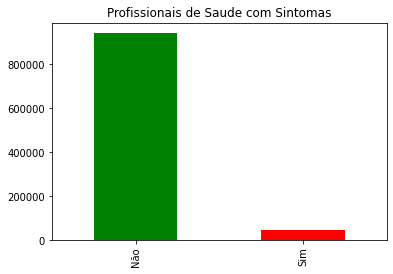

In [ ]:
df['profissionalSaude'].value_counts().plot.bar(color=['green', 'red'], title='Profissionais de Saude com Sintomas')

Maioria de Sintomas de Covid

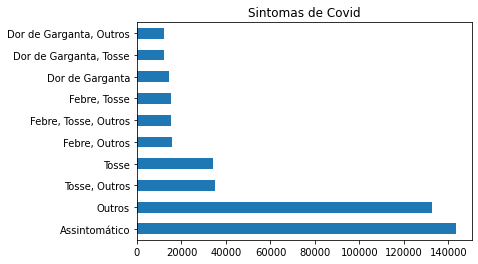

In [ ]:
df['sintomas'].value_counts().head(10).plot(kind='barh', title='Sintomas de Covid')

Testes Concluidos, Coletados , Solicitado

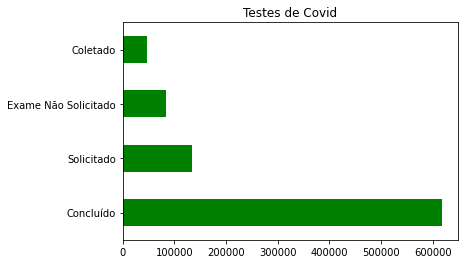

In [ ]:
df['estadoTeste'].value_counts().head().plot(kind='barh', title='Testes de Covid', color='green')

In [ ]:
df["condicoes"].value_counts()

Doenças cardíacas crônicas                                                                                                                                           26544
Doenças respiratórias crônicas descompensadas                                                                                                                        18372
Diabetes                                                                                                                                                             14288
Gestante                                                                                                                                                              4471
Obesidade                                                                                                                                                             4322
                                                                                                                                                 

Principais Comorbidades em pessoas com sintomas

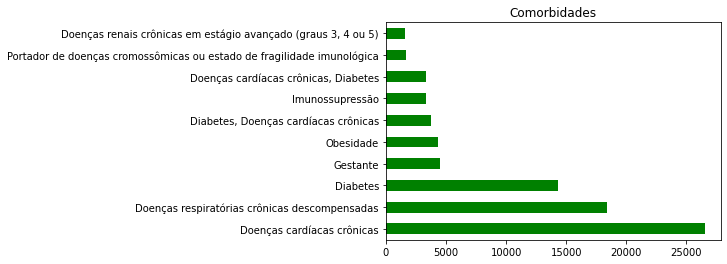

In [ ]:
df['condicoes'].value_counts().head(10).plot(kind='barh', title='Comorbidades', color='green')


Maiores Municipios 

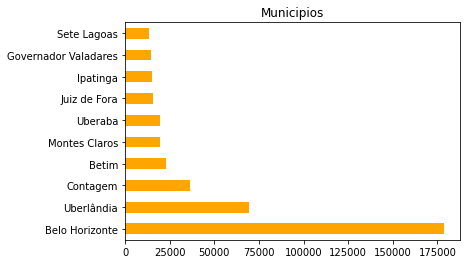

In [ ]:
df['municipio'].value_counts().head(10).plot(kind='barh', title='Municipios', color='Orange')

Quantidade por Sexo

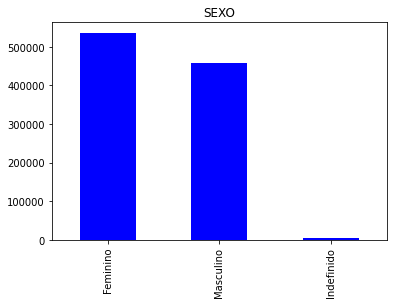

In [ ]:
df['sexo'].value_counts().head(10).plot(kind='bar', title='SEXO', color='blue')

Resultados dos Testes conlcuidos

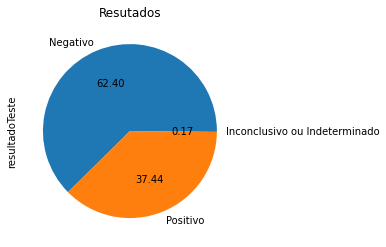

In [ ]:
df['resultadoTeste'].value_counts().head(10).plot.pie(autopct="%.2f",title='Resutados')

In [ ]:
import seaborn as sns

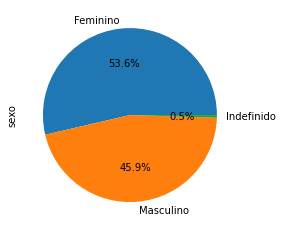

In [ ]:
df["sexo"].value_counts().sort_values(ascending=False).plot.pie(y="profissionalSaude",autopct="%0.1f%%")

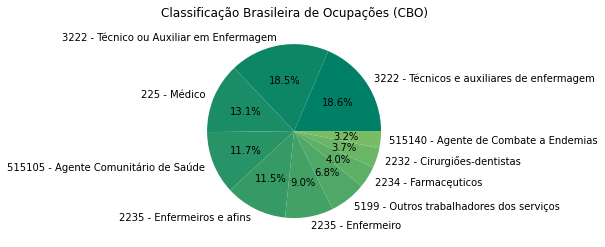

In [ ]:
df["cbo"].value_counts().sort_values(ascending=False).head(10).plot.pie(y="profissionalSaude",colors='greens',autopct="%0.1f%%")
plt.title("Classificação Brasileira de Ocupações (CBO)")
plt.axis("off")
plt.show()

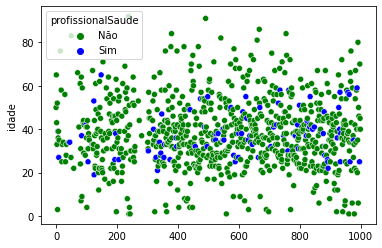

In [ ]:
sns.scatterplot( y=df["idade"].head(1000), x=df.index, hue=df["profissionalSaude"],palette=["green", "blue"])
#separar em duas colunas

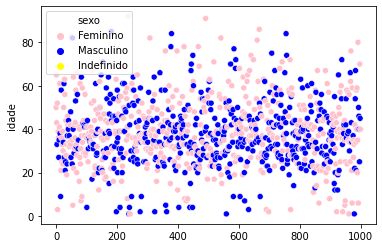

In [ ]:
sns.scatterplot( y=df["idade"].head(1000), x=df.index, hue=df["sexo"],palette=["pink", "blue","yellow"])


Text(0.5, 1.0, 'Evolucao dos casos')

/usr/local/lib/python3.7/dist-packages/google/colab/_event_manager.py:28: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.

/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.



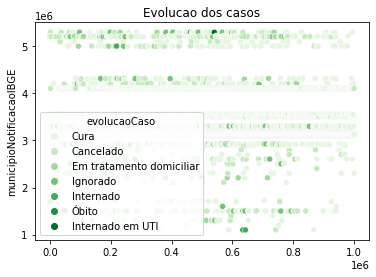

In [ ]:
sns.scatterplot(y=df["municipioNotificacaoIBGE"], x=df.index, hue=df["evolucaoCaso"],palette= 'Greens')
plt.title('Evolucao dos casos')

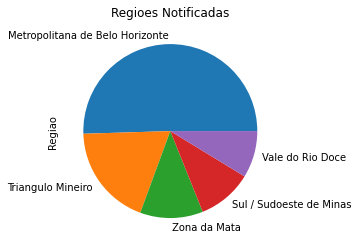

In [ ]:
df['Regiao'].value_counts().head(5).plot(kind="pie",title='Regioes Notificadas')

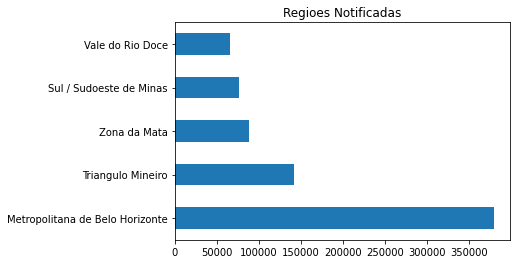

In [ ]:
df['Regiao'].value_counts().head(5).plot(kind="barh",title='Regioes Notificadas')

## Resultado dos dados

   O dataset apresentado trata sobre os sintomas gripais entre profissionais da saúde que foram notificados no estado de Minas Gerais. Foi realizada tratamento dos dados onde se encontava muitas colunas que nao era necessaria para este tipo de analise e, bastante numeros faltantes, sendo assim uma analise com incidencia de erro alta, foi feito tambem uma análise prévia para fazer o levantamento da quantidade de pessoas, qual o gênero com maior incidência, a quantidade de cidades em que se notificaram casos e quais as profissões que tiveram mais casos. Posteriormente foi realizado um tratamento de dados, onde foi criada uma nova coluna chamada região, para que se pudesse analisar estado como um todo, ao invés de ter uma análise por município, temos uma análise por macrorregião, sendo assim mais simples para que se identificar onde ocorreu mais casos. Os resultados obtidos foram em sua maioria um pequeno número de profissionais da saúde apresentaram sintomas gripais. Dentre os que tiveram sintomas os mais apresentados foram a tosse e a febre, e para essa análise houve um alto número de testes para covid solicitados e que foram completados. Entre as pessoas com comorbidades as que mais apresentaram sintomas foram as com doenças cardíacas e com doenças respiratórias crônicas. O gênero feminino teve uma leve vantagem em número de casos. 62,4% dos teste para covid realizados tiveram resultado negativo. A região com maior número de notificações foi a metropolitana de Belo Horizonte, seguida por Triângulo Mineiro, Zona da Mata, Sul/Sudoeste de Minas e Vale do Rio Doce.





